<h2 style="color: #1E90FF">Projeto: Análises Preditiva de dados</h2>

<h3 style="color: #6495ED">1. Definição do projeto e Instalação de Bibliotecas</h3>

<h3 style="color: #00BFFF">Etapas do Projeto:</h3>

1. Definição do projeto e Instalação de Bibliotecas;
2. Carregar e visualisar dados;
3. Análises Exploratória de Dados;
4. Treinamento do modelo Machine Learning;
5. Realizando Previsões;
6. Análise gráfica com previsões.

In [4]:
import yfinance as yf
import pandas as pd

<h3 style="color: #00BFFF">2. Carregar e visualisar dados</h3>

In [5]:
ticker = input("Digite o código da ação: ")
dados = yf.Ticker(ticker).history("2y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-12 00:00:00-03:00,17.744900,18.549594,17.675530,18.209681,117237500,0.0,0.0
2023-05-15 00:00:00-03:00,18.077878,18.140312,17.620035,17.800398,81996700,0.0,0.0
2023-05-16 00:00:00-03:00,18.112563,18.750769,18.091752,18.244366,117782700,0.0,0.0
2023-05-17 00:00:00-03:00,18.452478,18.563471,17.696343,17.800398,107129200,0.0,0.0
2023-05-18 00:00:00-03:00,17.751837,17.932200,17.585349,17.904451,63010500,0.0,0.0


In [6]:
dados.Close

Date
2023-05-12 00:00:00-03:00    18.209681
2023-05-15 00:00:00-03:00    17.800398
2023-05-16 00:00:00-03:00    18.244366
2023-05-17 00:00:00-03:00    17.800398
2023-05-18 00:00:00-03:00    17.904451
                               ...    
2025-05-06 00:00:00-03:00    30.150000
2025-05-07 00:00:00-03:00    30.290001
2025-05-08 00:00:00-03:00    30.709999
2025-05-09 00:00:00-03:00    30.910000
2025-05-12 00:00:00-03:00    31.650000
Name: Close, Length: 498, dtype: float64

<Axes: xlabel='Date'>

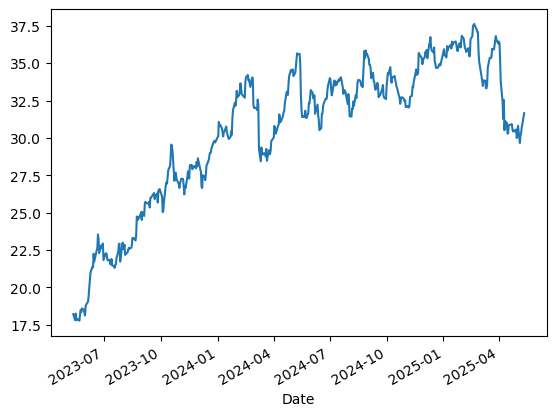

In [7]:
dados.Close.plot()

In [8]:
# Criar um DataFrame para salvar Tabela de Dados
df = pd.DataFrame(dados)

# Salvar o DataFrame para um arquivo Excel
df.to_excel("Dados Ações da PETR4.SA.xlsx", sheet_name="Planilha1", index=False)

In [9]:
tabelas_dados = pd.read_excel("Dados Ações da PETR4.SA.xlsx")
display(tabelas_dados)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,17.744900,18.549594,17.675530,18.209681,117237500,0.0,0
1,18.077878,18.140312,17.620035,17.800398,81996700,0.0,0
2,18.112563,18.750769,18.091752,18.244366,117782700,0.0,0
3,18.452478,18.563471,17.696343,17.800398,107129200,0.0,0
4,17.751837,17.932200,17.585349,17.904451,63010500,0.0,0
...,...,...,...,...,...,...,...
493,30.110001,30.389999,29.959999,30.150000,52751300,0.0,0
494,30.299999,30.299999,29.900000,30.290001,35050400,0.0,0
495,30.590000,31.030001,30.450001,30.709999,44665000,0.0,0
496,31.100000,31.180000,30.639999,30.910000,25075600,0.0,0


<h3 style="color: #00BFFF">3. Análises Exploratória de Dados</h3>
- Tratamento de Dados

In [10]:
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-12 00:00:00-03:00,17.744900,18.549594,17.675530,18.209681,117237500,0.0,0.0
2023-05-15 00:00:00-03:00,18.077878,18.140312,17.620035,17.800398,81996700,0.0,0.0
2023-05-16 00:00:00-03:00,18.112563,18.750769,18.091752,18.244366,117782700,0.0,0.0
2023-05-17 00:00:00-03:00,18.452478,18.563471,17.696343,17.800398,107129200,0.0,0.0
2023-05-18 00:00:00-03:00,17.751837,17.932200,17.585349,17.904451,63010500,0.0,0.0


In [11]:
dados.reset_index()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-05-12 00:00:00-03:00,17.744900,18.549594,17.675530,18.209681,117237500,0.0,0.0
1,2023-05-15 00:00:00-03:00,18.077878,18.140312,17.620035,17.800398,81996700,0.0,0.0
2,2023-05-16 00:00:00-03:00,18.112563,18.750769,18.091752,18.244366,117782700,0.0,0.0
3,2023-05-17 00:00:00-03:00,18.452478,18.563471,17.696343,17.800398,107129200,0.0,0.0
4,2023-05-18 00:00:00-03:00,17.751837,17.932200,17.585349,17.904451,63010500,0.0,0.0
...,...,...,...,...,...,...,...,...
493,2025-05-06 00:00:00-03:00,30.110001,30.389999,29.959999,30.150000,52751300,0.0,0.0
494,2025-05-07 00:00:00-03:00,30.299999,30.299999,29.900000,30.290001,35050400,0.0,0.0
495,2025-05-08 00:00:00-03:00,30.590000,31.030001,30.450001,30.709999,44665000,0.0,0.0
496,2025-05-09 00:00:00-03:00,31.100000,31.180000,30.639999,30.910000,25075600,0.0,0.0


In [12]:
treinamento = dados.reset_index()
treinamento = treinamento[["Date", "Close"]]
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)
treinamento

,Date,Close
0,2023-05-12,18.209681
1,2023-05-15,17.800398
2,2023-05-16,18.244366
3,2023-05-17,17.800398
4,2023-05-18,17.904451
...,...,...
493,2025-05-06,30.150000
494,2025-05-07,30.290001
495,2025-05-08,30.709999
496,2025-05-09,30.910000


In [13]:
# Renomear as colunas de dados
treinamento.columns = ["ds","y"]
treinamento


,ds,y
0,2023-05-12,18.209681
1,2023-05-15,17.800398
2,2023-05-16,18.244366
3,2023-05-17,17.800398
4,2023-05-18,17.904451
...,...,...
493,2025-05-06,30.150000
494,2025-05-07,30.290001
495,2025-05-08,30.709999
496,2025-05-09,30.910000


<h3 style="color: #00BFFF">4. Treinamento do modelo Machine Learning</h3>


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly



In [15]:
# Criar modelo 
modelo = Prophet()


In [ ]:
# Treinar modelo de Inteligência Artificial - ML
modelo.fit(treinamento)

17:41:35 - cmdstanpy - INFO - Chain [1] start processing
17:41:37 - cmdstanpy - INFO - Chain [1] done processing


<h3 style="color: #00BFFF">5. Realizando Previsões</h3>


In [19]:
periodo = modelo.make_future_dataframe(30)

In [20]:
periodo.tail()

,ds
523,2025-06-07
524,2025-06-08
525,2025-06-09
526,2025-06-10
527,2025-06-11


In [21]:
previsoes = modelo.predict(periodo)

In [22]:
previsoes

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-05-12,19.177307,18.063016,20.765473,19.177307,19.177307,0.289695,0.289695,0.289695,0.170650,0.170650,0.170650,0.119045,0.119045,0.119045,0.0,0.0,0.0,19.467001
1,2023-05-15,19.335384,17.910288,20.668252,19.335384,19.335384,0.002920,0.002920,0.002920,0.224354,0.224354,0.224354,-0.221433,-0.221433,-0.221433,0.0,0.0,0.0,19.338305
2,2023-05-16,19.388077,17.902133,20.559276,19.388077,19.388077,-0.119143,-0.119143,-0.119143,0.237465,0.237465,0.237465,-0.356609,-0.356609,-0.356609,0.0,0.0,0.0,19.268933
3,2023-05-17,19.440769,17.744590,20.537726,19.440769,19.440769,-0.300514,-0.300514,-0.300514,0.197713,0.197713,0.197713,-0.498227,-0.498227,-0.498227,0.0,0.0,0.0,19.140256
4,2023-05-18,19.493462,17.706571,20.336366,19.493462,19.493462,-0.458997,-0.458997,-0.458997,0.184385,0.184385,0.184385,-0.643382,-0.643382,-0.643382,0.0,0.0,0.0,19.034465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2025-06-07,31.344156,28.527568,31.177965,31.286089,31.398232,-1.524452,-1.524452,-1.524452,-0.507284,-0.507284,-0.507284,-1.017169,-1.017169,-1.017169,0.0,0.0,0.0,29.819704
524,2025-06-08,31.323746,28.609520,31.317489,31.261744,31.380127,-1.400602,-1.400602,-1.400602,-0.507283,-0.507283,-0.507283,-0.893318,-0.893318,-0.893318,0.0,0.0,0.0,29.923144
525,2025-06-09,31.303337,29.472436,32.077411,31.237666,31.364584,-0.544056,-0.544056,-0.544056,0.224354,0.224354,0.224354,-0.768410,-0.768410,-0.768410,0.0,0.0,0.0,30.759280
526,2025-06-10,31.282927,29.630913,32.264345,31.211971,31.348880,-0.407398,-0.407398,-0.407398,0.237465,0.237465,0.237465,-0.644863,-0.644863,-0.644863,0.0,0.0,0.0,30.875529


<h3 style="color: #00BFFF">6. Análise gráfica com previsões</h3>

In [25]:
graph = plot_plotly(modelo, previsoes)
graph